**MODEL** **BUILDING**

Libraries Required

In [114]:
import nltk #for building programs for text analysis(The Natural Language Toolkit)
from nltk.corpus import stopwords #getting the stopwords from nltk corpus function
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re # regular expression, helps us to match or find other strings or sets of strings
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('wordnet')
from nltk.corpus import wordnet
import textblob#perform basic NLP tasks.
from textblob import TextBlob
from textblob import Word
import string 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report#To get the classification report such as precison,recall(sesitivity),f1 score, support.. 
from sklearn.feature_extraction.text import CountVectorizer#Used to convert collection of text documents to a matrix of token counts.
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer#term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading the csv file

In [115]:
from google.colab import files 
uploaded = files.upload()

Saving Hotel_Reviews_Ratings.csv to Hotel_Reviews_Ratings (2).csv


In [94]:

hotel=pd.read_csv("Hotel_Reviews_Ratings.csv")#Loading the dataset

hotel.head()

,reviews,ratings
0,We have stayed at this excellent hotel before ...,5
1,We had a fantastic overnight staycation to rec...,5
2,We chose this hotel for an overnight stay base...,3
3,"Really nice hotel, staff were very helpful and...",5
4,We stayed here for a week in September and rea...,5


Last 10 observations

In [95]:
hotel.tail(10)

,reviews,ratings
1990,"Basically, this place should be better than it...",3
1991,My wife and I spent two nights at the Hotel De...,5
1992,We stayed for a week between 20-27th July 2012...,3
1993,Nice hotel with good bars and resteraunts room...,5
1994,Hotel de France is set back from the main road...,4
1995,This was our third stay at this lovely hotel a...,5
1996,We visited in early July and stayed for 5 nigh...,5
1997,"took my wife here for 5 nights, had a spa room...",4
1998,"Booked a double room. When I arrived, checked...",1
1999,Great Hotel. Was there for 3 nights. Staff w...,5


In [116]:
#Classifiying the rating into positive, Negative, Neutral 
#Rating which is greater than 3 considered as +ve, Less than 3 considered as -ve, And 3 is considered as Neutral.
Sentiment_Rating = [] 
for value in hotel["ratings"]: 
    if value > 3: 
        Sentiment_Rating.append(1) 
    elif value < 3: 
        Sentiment_Rating.append(2) 
    else: 
        Sentiment_Rating.append(0) 

In [117]:
hotel["Sentiment_Rating"] = Sentiment_Rating    #adding the classified column to the dataset
print(hotel)

                                                reviews  ...                                            Reviews
0     We have stayed at this excellent hotel before ...  ...  stayed excellent hotel hoped stay today howeve...
1     We had a fantastic overnight staycation to rec...  ...  fantastic overnight staycation recharge batter...
2     We chose this hotel for an overnight stay base...  ...  chose hotel overnight stay based pool facility...
3     Really nice hotel, staff were very helpful and...  ...  really nice hotel staff helpful friendly weari...
4     We stayed here for a week in September and rea...  ...  stayed week september really enjoyed stay staf...
...                                                 ...  ...                                                ...
1995  This was our third stay at this lovely hotel a...  ...  third stay lovely hotel would love return staf...
1996  We visited in early July and stayed for 5 nigh...  ...  visited early july stayed night returning 

In [98]:
hotel.head(10)


,reviews,ratings,Sentiment_Rating
0,We have stayed at this excellent hotel before ...,5,1
1,We had a fantastic overnight staycation to rec...,5,1
2,We chose this hotel for an overnight stay base...,3,0
3,"Really nice hotel, staff were very helpful and...",5,1
4,We stayed here for a week in September and rea...,5,1
5,During the Covid 19 crisis the trick for hotel...,5,1
6,Stayed at this hotel 5 times in 7 months for b...,5,1
7,This hotel offered outstanding service from st...,5,1
8,We stayed for a week in July and wasn't disapp...,5,1
9,14 of us spent the most wonderful afternoon at...,5,1


In [118]:
hotel['Sentiment_Rating'].value_counts()#counting the positve and negative, Neutral reviews


1    1769
0     172
2      59
Name: Sentiment_Rating, dtype: int64

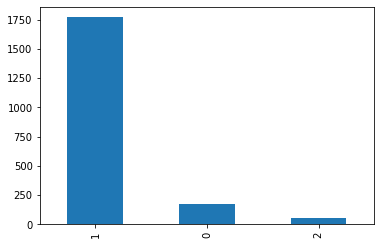

In [11]:
hotel['Sentiment_Rating'].value_counts().plot.bar()

#we can say there are 1769 positive reviews and 59 negatives reviews, 172 Neutral reviews.


#                                 preprocessing the reviews######################


In [119]:

#converting the review to lower case
hotel['Reviews']= hotel['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

#removing the punctuations from the reviews
hotel['Reviews']=hotel['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

#removing the numericals from the reviews
hotel['Reviews']=hotel['Reviews'].str.replace('[0-9]','')

#removing all the stopwords from the reviews
stop_words=stopwords.words('english')
hotel['Reviews']=hotel['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

#Applying Lemmitaization to the reviews
hotel['Reviews']= hotel['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#removing the unwanted symbols from the reviews
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
hotel['Reviews']= hotel['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

###USING COUNTVECTORIZER###


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(hotel.Reviews)
# transform the documents in the training data to a document-term matrix
vectorized = vect.transform(hotel.Reviews).toarray()

In [102]:
#Applying the smoting technique to level the imbalanced scenario.
#pip install imblearn
from imblearn.over_sampling import SMOTE 
over_sample= SMOTE(random_state= 50, sampling_strategy= "all")
X_over,Y_over=over_sample.fit_sample(vectorized,hotel["Sentiment_Rating"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [103]:
#spliting the data's into train and test
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X_over,Y_over,test_size = 0.2,random_state=0)

############ MODEL BUILDING ############


##Model-1 using Logistic regression##


Training the model and predicting the result

In [104]:
from sklearn.linear_model import LogisticRegression
Logistic_model= LogisticRegression()#building the model
Logistic_model.fit(Xtrain,Ytrain)
predict_logistic= Logistic_model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
print("accuracy_score: ", f1_score(Ytest,predict_logistic,average='micro'))

accuracy_score:  0.9303201506591338


In [106]:
#classification Report
print("Classification Report \n\n\n", classification_report(Ytest,predict_logistic))


Classification Report 


               precision    recall  f1-score   support

           0       0.92      0.88      0.90       358
           1       0.93      0.93      0.93       352
           2       0.94      0.98      0.96       352

    accuracy                           0.93      1062
   macro avg       0.93      0.93      0.93      1062
weighted avg       0.93      0.93      0.93      1062



confusion_matrix

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,predict_logistic)
print (confusion_matrix)

[[316  23  19]
 [ 22 326   4]
 [  4   2 346]]


###Model2 using Naive bayes###


Training the model and predicting the result

In [108]:
from sklearn.naive_bayes import MultinomialNB
# fit the training dataset on the NB classifier
Naive = MultinomialNB()
Naive.fit(Xtrain,Ytrain)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Xtest)

In [109]:
print("accuracy_score: ", f1_score(Ytest,predictions_NB,average='micro'))


accuracy_score:  0.8898305084745762


In [110]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,predictions_NB))


Classification Report 


               precision    recall  f1-score   support

           0       0.91      0.81      0.86       358
           1       0.84      0.96      0.90       352
           2       0.93      0.90      0.92       352

    accuracy                           0.89      1062
   macro avg       0.89      0.89      0.89      1062
weighted avg       0.89      0.89      0.89      1062



confusion_matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,predictions_NB)
print (confusion_matrix)

[[289  46  23]
 [ 13 339   0]
 [ 16  19 317]]


###Model3 using support vector machine###


Training the model and predicting the result

In [27]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import svm
from sklearn.svm import LinearSVC
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Xtrain,Ytrain)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Xtest)

In [28]:
print("accuracy_score: ", f1_score(Ytest,predictions_SVM,average='micro'))


accuracy_score:  0.9256120527306968


In [29]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,predictions_SVM))


Classification Report 


               precision    recall  f1-score   support

           0       0.91      0.88      0.89       358
           1       0.92      0.92      0.92       352
           2       0.94      0.98      0.96       352

    accuracy                           0.93      1062
   macro avg       0.93      0.93      0.93      1062
weighted avg       0.93      0.93      0.93      1062



confusion_matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,predictions_SVM)
print (confusion_matrix)

[[315  24  19]
 [ 26 324   2]
 [  5   3 344]]


###Model4 using Decision Tree###


Training the model and predicting the result

In [32]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_classifier = DecisionTreeClassifier(criterion = 'entropy')
DecisionTree_classifier.fit(Xtrain, Ytrain)
Prediction_DC=DecisionTree_classifier.predict(Xtest)

In [33]:
print("accuracy_score: ", f1_score(Ytest,Prediction_DC,average='micro'))


accuracy_score:  0.8870056497175142


In [34]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,Prediction_DC))


Classification Report 


               precision    recall  f1-score   support

           0       0.83      0.90      0.87       358
           1       0.92      0.79      0.85       352
           2       0.92      0.97      0.94       352

    accuracy                           0.89      1062
   macro avg       0.89      0.89      0.89      1062
weighted avg       0.89      0.89      0.89      1062



confusion_matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,Prediction_DC)
print (confusion_matrix)

[[323  21  14]
 [ 59 277  16]
 [  6   4 342]]


###Model5 using Random forest Classifier###


Training the model and predicting the result

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=1000,criterion="entropy")
rf.fit(Xtrain,Ytrain)
Rf_Prediction=rf.predict(Xtest)

In [37]:
print("accuracy_score: ", f1_score(Ytest,Rf_Prediction,average='micro'))

accuracy_score:  0.9491525423728814


In [38]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,Rf_Prediction))

Classification Report 


               precision    recall  f1-score   support

           0       0.94      0.91      0.93       358
           1       0.93      0.95      0.94       352
           2       0.98      0.99      0.98       352

    accuracy                           0.95      1062
   macro avg       0.95      0.95      0.95      1062
weighted avg       0.95      0.95      0.95      1062



confusion_matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,Rf_Prediction)
print (confusion_matrix)

[[326  24   8]
 [ 17 335   0]
 [  2   3 347]]


###Model6 using KNN###


Training the model and predicting the result

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNC
# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)
neigh.fit(Xtrain,Ytrain)
Knn_Prediction=neigh.predict(Xtest)

In [41]:
print("accuracy_score: ", f1_score(Ytest,Knn_Prediction,average='micro'))

accuracy_score:  0.6506591337099812


In [42]:
print("Classification Report \n\n\n", classification_report(Ytest,Knn_Prediction))

Classification Report 


               precision    recall  f1-score   support

           0       0.55      0.94      0.70       358
           1       1.00      0.01      0.02       352
           2       0.78      0.99      0.87       352

    accuracy                           0.65      1062
   macro avg       0.78      0.65      0.53      1062
weighted avg       0.78      0.65      0.53      1062



confusion_matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,Knn_Prediction)
print (confusion_matrix)

[[338   0  20]
 [270   4  78]
 [  3   0 349]]


###MODEL7 USING XG BOOST###


Training the model and predicting the result

In [45]:
#pip install xgboost
from xgboost import XGBClassifier
Xg=XGBClassifier()
Xg.fit(Xtrain,Ytrain)
XG_prediction=Xg.predict(Xtest)

In [46]:
print("accuracy_score: ", f1_score(Ytest,XG_prediction,average='micro'))

accuracy_score:  0.8832391713747646


In [47]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,XG_prediction))

Classification Report 


               precision    recall  f1-score   support

           0       0.89      0.79      0.84       358
           1       0.90      0.91      0.90       352
           2       0.86      0.95      0.91       352

    accuracy                           0.88      1062
   macro avg       0.88      0.88      0.88      1062
weighted avg       0.88      0.88      0.88      1062



confusion_matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,XG_prediction)
print (confusion_matrix)

[[284  30  44]
 [ 24 319   9]
 [ 11   6 335]]


###Model8 using Randomized searhCV with logistic regression###


Training the model and predicting the result

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(Xtrain, Ytrain)
search_prediction=search.predict(Xtest)

In [50]:
print("accuracy_score: ", f1_score(Ytest,search_prediction,average='micro'))


accuracy_score:  0.9246704331450094


In [51]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,search_prediction))


Classification Report 


               precision    recall  f1-score   support

           0       0.92      0.87      0.89       358
           1       0.92      0.93      0.93       352
           2       0.93      0.97      0.95       352

    accuracy                           0.92      1062
   macro avg       0.92      0.92      0.92      1062
weighted avg       0.92      0.92      0.92      1062



confusion_matrix

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,search_prediction)
print (confusion_matrix)

[[312  25  21]
 [ 20 328   4]
 [  8   2 342]]


###Model-9 using TFIDF vectorizer with Multinomial Naive bayes###


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer#term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus
# Fit the TfidfVectorizer to the training data
Tfidf = TfidfVectorizer().fit(hotel.Reviews)
# transform the documents in the training data to a document-term matrix
Tfidf_vect = Tfidf.transform(hotel.Reviews).toarray()

In [121]:
#Applying the smoting technique to level the imbalanced scenario.
#pip install imblearn
from imblearn.over_sampling import SMOTE 
over_sample= SMOTE(random_state= 50, sampling_strategy= "all")
X_over,Y_over=over_sample.fit_sample(Tfidf_vect,hotel["Sentiment_Rating"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [122]:
#spliting the data's into train and test
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X_over,Y_over,test_size = 0.2,random_state=0)

Training the model and predicting the result


In [123]:
Naive = MultinomialNB()
Naive.fit(Xtrain,Ytrain)
# predict the labels on validation dataset
predictions_NB_Tfidf = Naive.predict(Xtest)

In [124]:
print("accuracy_score: ", f1_score(Ytest,predictions_NB_Tfidf,average='micro'))


accuracy_score:  0.9708097928436912


In [125]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,predictions_NB_Tfidf))

Classification Report 


               precision    recall  f1-score   support

           0       0.93      0.99      0.96       358
           1       0.99      0.92      0.95       352
           2       0.99      1.00      0.99       352

    accuracy                           0.97      1062
   macro avg       0.97      0.97      0.97      1062
weighted avg       0.97      0.97      0.97      1062



confusion_matrix

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,predictions_NB_Tfidf)
print (confusion_matrix)

[[356   2   0]
 [ 25 323   4]
 [  0   0 352]]


###Model-10 Using Tfidf with Logistic regression###


Training the model and predicting the result

In [88]:
from sklearn.linear_model import LogisticRegression
Logistic_model_tfidf= LogisticRegression()#building the model
Logistic_model_tfidf.fit(Xtrain,Ytrain)
predict_logistic_tfidf= Logistic_model_tfidf.predict(Xtest)

In [89]:
print("accuracy_score: ", f1_score(Ytest,predict_logistic_tfidf,average='micro'))

accuracy_score:  0.980225988700565


In [90]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,predict_logistic_tfidf))

Classification Report 


               precision    recall  f1-score   support

           0       0.95      1.00      0.98       358
           1       1.00      0.94      0.97       352
           2       0.99      1.00      1.00       352

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



confusion_matrix

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,predict_logistic_tfidf)
print (confusion_matrix)

[[358   0   0]
 [ 18 331   3]
 [  0   0 352]]


Model-11 using Tfidf with RandomForest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=1000,criterion="entropy")
rf.fit(Xtrain,Ytrain)
Rf_Prediction_tfidf=rf.predict(Xtest)

In [132]:
print("accuracy_score: ", f1_score(Ytest,Rf_Prediction_tfidf,average='micro'))

accuracy_score:  0.9839924670433146


In [133]:
#Classification Report
print("Classification Report \n\n\n", classification_report(Ytest,Rf_Prediction_tfidf))

Classification Report 


               precision    recall  f1-score   support

           0       1.00      0.96      0.98       358
           1       0.96      1.00      0.98       352
           2       1.00      1.00      1.00       352

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



confusion_matrix

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest,Rf_Prediction_tfidf)
print (confusion_matrix)

[[343  15   0]
 [  1 351   0]
 [  0   1 351]]


#We have build 11 different models using different algorithms and functions.
#And we found that Random Forest classifier using Tfidf vectorizer is giving us the best accuracy score which is 98%.


**Therefor we finalized our best model as RandomForest** **classifier, Which is Model 11.**